In [1]:
from fineNeat import Ind 
indiv = Ind.from_shapes([[12,4],[4,3]])

#### ANN Util Checks

In [19]:
from fineNeat.sneat_jax.ann import getMatOrder as getMatOrder_jax
from fineNeat.sneat_jax.ann import calwMat as calwMat_jax
from fineNeat.sneat_jax.ann import getMat as getMat_jax
from fineNeat.sneat_jax.ann import getLayer as getLayer_jax
from fineNeat.sneat_jax.ann import getNodeInfo as getNodeInfo_jax
from fineNeat import getMatOrder, getMat, getLayer, getNodeInfo, calwMat

import jax.numpy as jnp
import numpy as np 


connG, nodeG = np.copy(indiv.conn), np.copy(indiv.node)
connG_jnp, nodeG_jnp = jnp.copy(indiv.conn), jnp.copy(indiv.node)
nIns = len(nodeG[0,nodeG[1,:] == 1]) + len(nodeG[0,nodeG[1,:] == 4])
nOuts = len(nodeG[0,nodeG[1,:] == 2])

# calculate wMat
wMat_np, seq2node_np = calwMat(nodeG, connG)
wMat_jax, seq2node_jax = calwMat_jax(nodeG_jnp, connG_jnp)
print("wMat match:", jnp.allclose(wMat_jax, wMat_np))
print("seq2node match:", (seq2node_jax == seq2node_np).all())

# getMatOrder
order2seq = getMatOrder(nIns, nOuts, wMat_np)
order2seq_jax = getMatOrder_jax(nIns, nOuts, wMat_jax)
print("order2seq match:", (order2seq_jax == order2seq).all())

# getMat 
wMat_np, node2order_np, node2seq_np, seq2node_np = getMat(nodeG, connG)
wMat_jax, node2order_jax, node2seq_jax, seq2node_jax = getMat_jax(nodeG_jnp, connG_jnp)
print("wMat match:", jnp.allclose(wMat_jax, wMat_np))
print("node2order match:", (node2order_jax == node2order_np))
print("node2seq match:", (node2seq_jax == node2seq_np))
print("seq2node match:", (seq2node_jax == seq2node_np))

# getLayer
layer_np = getLayer(wMat_np, node2seq_np, node2order_np, seq2node_np)
layer_jax = getLayer_jax(wMat_jax, node2seq_jax, node2order_jax, seq2node_jax)
print("layer match:", (layer_jax == layer_np))

# getNodeInfo
nodemap_np, seq_node_indices_np, wMat_np = getNodeInfo(nodeG, connG)
nodemap_jax, seq_node_indices_jax, wMat_jax = getNodeInfo_jax(nodeG_jnp, connG_jnp)
print("nodemap match:", (nodemap_jax == nodemap_np))
print("seq_node_indices match:", (seq_node_indices_jax == seq_node_indices_np))
print("wMat match:", jnp.allclose(wMat_jax, wMat_np))

from fineNeat.sneat_jax.ann import act as act_jax
from fineNeat.neat_src.ann import act as act_np
from fineNeat.sneat_jax.ann import applyAct as applyAct_jax
from fineNeat.neat_src.ann import applyAct as applyAct_np

indiv.express()
aVec_np = np.array(indiv.aVec)
aVec_jax = jnp.array(indiv.aVec)
inPattern = np.ones((1,nIns))
inPattern_jax = jnp.ones((1,nIns))

# applyAct 
is_equals = []
for act_id in range(1, 12):
    is_equal = abs(applyAct_np(act_id, 1) - applyAct_jax(act_id, 1)) < 1e-6
    is_equals.append(is_equal)
all_equal = all(is_equals)
print(f"applyAct all_equal: {all_equal}")

# act 
act_np = act_np(wMat_np, aVec_np, nIns, nOuts, inPattern)
act_jax = act_jax(wMat_jax, aVec_jax, nIns, nOuts, inPattern_jax)
print("act match:", jnp.allclose(act_jax, act_np))

# obtainOutgoingConnections
from fineNeat.sneat_jax.ann import obtainOutgoingConnections as obtainOutgoingConnections_jax
from fineNeat.neat_src.ann import obtainOutgoingConnections as obtainOutgoingConnections_np
is_equals = []
for node_id in range(nIns, nIns + nOuts):
    is_equal = (obtainOutgoingConnections_np(connG, node_id) == obtainOutgoingConnections_jax(connG_jnp, node_id)).all()
    is_equals.append(is_equal)
all_equal = all(is_equals)
print(f"obtainOutgoingConnections all_equal: {all_equal}")

wMat match: True
seq2node match: True
order2seq match: True
wMat match: True
node2order match: True
node2seq match: True
seq2node match: True
layer match: True
nodemap match: True
seq_node_indices match: True
wMat match: True
applyAct all_equal: True
act match: True
obtainOutgoingConnections all_equal: True


### Ind Checks 

In [1]:
from fineNeat import loadHyp, updateHyp, load_task

hyp_default = './fineNeat/p/default_sneat.json'
hyp_adjust = './fineNeat/p/volley_default.json'
fileName = "volley"

hyp = loadHyp(pFileName=hyp_default, load_task=load_task)
updateHyp(hyp,load_task,hyp_adjust)

In [2]:
from fineNeat.sneat_jax.ind import Ind as Ind_jax
from fineNeat.neat_src.ind import Ind as Ind_np

ind_jax = Ind_jax.from_shapes([[12,4],[4,3]])
ind_np = Ind_np.from_shapes([[12,4],[4,3]])

# ind_jax.mutate(hyp, seed=0)
# ind_np.mutate(hyp)

In [5]:
# ind_jax.conn
from fineNeat.sneat_jax.ann import getNodeInfo as getNodeInfo_jax
from fineNeat.neat_src.ann import getNodeInfo as getNodeInfo_np
from fineNeat import viewInd, Ind, fig2img
import numpy as np 
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm import tqdm

# it's not faster ... according to mine implementation here ... 
frames = []
for _ in tqdm(range(100)):
    ind_jax.express()
    child_jax, _ =ind_jax.mutate(hyp, seed=0)
    fig, ax = viewInd(child_jax.to_np())
    frames.append(fig2img(fig))
    plt.close(fig)
    ind_jax = child_jax

 82%|████████▏ | 82/100 [03:10<00:58,  3.27s/it]

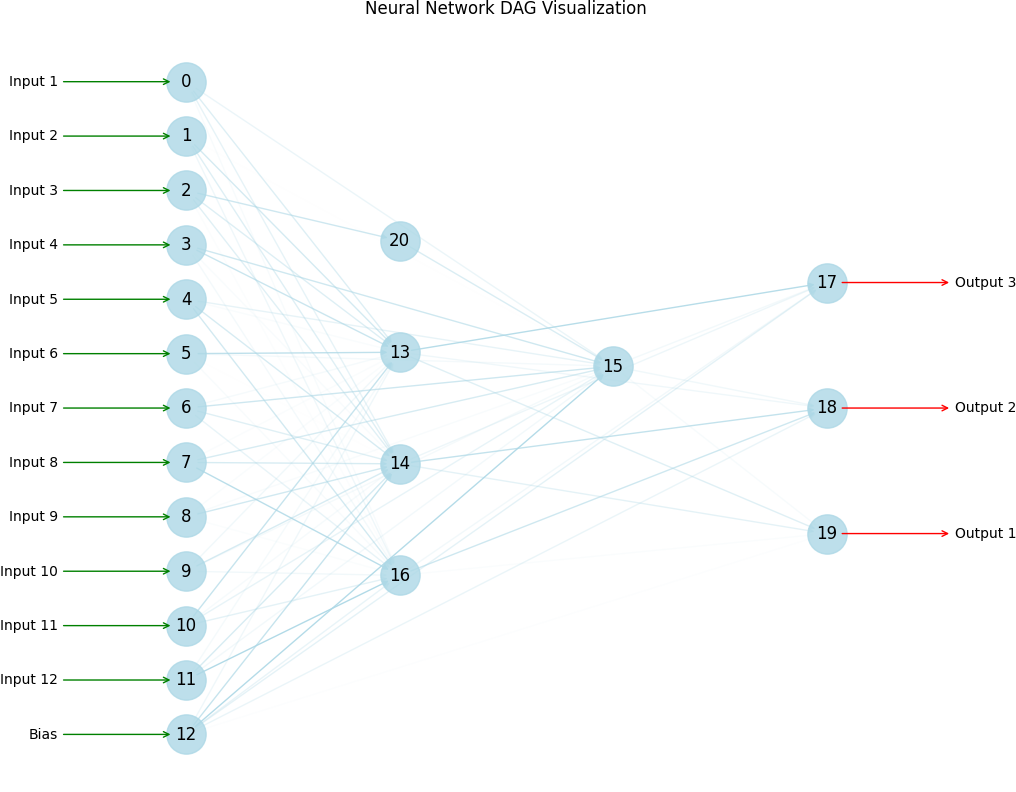

In [8]:
frames[19]

In [ ]:
# JIT compile to speed up jax ver. of NEAT ? 
from functools import partial
import jax
import jax.numpy as jnp

# JIT compile the mutation and expression operations
@jax.jit
def mutate_and_express(ind, hyp, key):
    ind.express()
    child, _ = ind.mutate(hyp, key)
    return child

# Create a batched version for multiple mutations
@jax.vmap
def batch_mutate(inds, keys):
    return mutate_and_express(inds, hyp, keys)

# Generate multiple random keys at once
keys = jax.random.split(jax.random.PRNGKey(0), 100)

# Run mutations in parallel
children = batch_mutate(jnp.array([ind_jax] * 100), keys)

# If you need to visualize, do it after the computation
frames = []
for child in children:
    fig, ax = viewInd(child.to_np())
    frames.append(fig2img(fig))
    plt.close(fig)

In [4]:
# np.save("connG_np.npy", connG_np)
# np.save("nodeG_np.npy", nodeG_np)
import numpy as np 
import jax.numpy as jnp 
connG_np = np.load("connG_np.npy")
nodeG_np = np.load("nodeG_np.npy")

# copy to jax 
nodeG_jax = jnp.copy(nodeG_np)
connG_jax = jnp.copy(connG_np)

# debug against getNodeInfo jax & numpy ver. 
from fineNeat.sneat_jax.ann import getNodeInfo as getNodeInfo_jax
from fineNeat.neat_src.ann import getNodeInfo as getNodeInfo_np
from fineNeat.sneat_jax.ann import getMat as getMat_jax
from fineNeat.neat_src.ann import getMat as getMat_np
from fineNeat.sneat_jax.ann import calwMat as calwMat_jax
from fineNeat.neat_src.ann import calwMat as calwMat_np
from fineNeat.sneat_jax.ann import getMatOrder as getMatOrder_jax
from fineNeat.neat_src.ann import getMatOrder as getMatOrder_np

# calwMat gives same result ... 
wMat_jax, seq2node_jax = calwMat_jax(nodeG_jax, connG_jax)
wMat_np, seq2node_np = calwMat_np(nodeG_np, connG_np)
print("wMat match: ", np.isclose(wMat_jax, wMat_np).all().item(), "\nseq2node match: ", np.isclose(seq2node_jax, seq2node_np).all().item())

# getMatOrder 
nIns = len(nodeG_jax[0,nodeG_jax[1,:] == 1]) + len(nodeG_jax[0,nodeG_jax[1,:] == 4])
nOuts = len(nodeG_jax[0,nodeG_jax[1,:] == 2])
order2seq_jax = getMatOrder_jax(nIns, nOuts, wMat_jax)
order2seq_np = getMatOrder_np(nIns, nOuts, wMat_np)
print("order2seq match: ", np.isclose(order2seq_jax, order2seq_np).all().item())

# getMat gives different result ...  
wMat_jax, node2order_jax, node2seq_jax, seq2node_jax = getMat_jax(nodeG_jax, connG_jax) # mismatch in node2order, seq2node
wMat_np, node2order_np, node2seq_np, seq2node_np = getMat_np(nodeG_np, connG_np)
print("node2order match: ", node2order_jax == node2order_np, "\nnode2seq match: ", node2seq_jax == node2seq_np, "\nseq2node match: ", (seq2node_jax == seq2node_np))

# getNodeInfo 
nodemap_jax, seq_node_indices_jax, wMat_jax = getNodeInfo_jax(nodeG_jax, connG_jax)
nodemap_np, seq_node_indices_np, wMat_np = getNodeInfo_np(nodeG_np, connG_np)
print("nodemap match: ", nodemap_jax == nodemap_np, "\nseq_node_indices match: ", (seq_node_indices_jax == seq_node_indices_np), "\nwMat match: ", jnp.isclose(wMat_jax, wMat_np).all().item())

wMat match:  True 
seq2node match:  True
order2seq match:  True
node2order match:  True 
node2seq match:  True 
seq2node match:  True
nodemap match:  True 
seq_node_indices match:  True 
wMat match:  True
